In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
4200, 1.4
256322 4200, 1.14
402386 4090, 1.40
89531  4430, 1.74 
67494  4150, 1.70
234932 3950, 0.60
244694 4200, 1.15

4200, 2.2


4800, 1.4
244853 4590, 1.33
402322 4720, 1.70
234779 4650, 1.10
234822 4660, 2.24

4800, 2.2
244819 4650, 2.44
234816 4650, 2.30
256289 4870, 2.70
402370 4840, 2.00
554709 4860, 2.70
244523 4680, 2.05
101395 4800, 2.95
392942 4700, 2.22
412759 4650, 2.18
B-107  4990, 2.00
B-122  4900, 2.7
B-128  4800, 2.5
B-130  4850, 2.2


SyntaxError: invalid syntax (<ipython-input-2-20a541059ad8>, line 2)

In [245]:
atfil = open('atom-uves-580.dat')
cols = [raw.strip().split() for raw in atfil]
trim = cols
lineprops = []
for n, i in enumerate(trim):
    if (len(i) <= 4):
        el = i[0][:-1]
        if el == 'O':
            lineprops.append([i[0], i[1], trim[n+1][0], trim[n+1][1]])

In [236]:
selected = []
sel = np.genfromtxt('first-list.dat')
for l in lineprops:
    if float(l[1]) in sel:
        selected.append(l)
lineprops = selected

In [3]:
def bissec(A,x):
    n = len(A)-1
    if (x < A[0]):
        return 0
    elif (x > A[n]):
        return n+1
    n1 = 0
    n2 = n
    while ((n2-n1)>1):
        nm = (n1+n2)/2
        if ((x-A[nm]) > 0):
            n1 = nm
        else:
            n2 = nm
    return n1

In [4]:
def drw_ln(axis, info, y, ytx=0.1):
    lbd = info[1]
    plc = (lbd, y)
    txt = (lbd, y-ytx)
    arw = {'width': 0.1, 'headwidth': 0.01, 'headlength': 0.01, 'shrink': 0.1}
    line = axis.annotate('%s %s'%(info[0],lbd), plc, txt, arrowprops=arw, rotation='vertical', ha='right', va='top', size=8)
    props = axis.annotate('%s %s'%(info[2],info[3]), plc, txt, arrowprops=arw, rotation='vertical', ha='left', va='top', size=8)
    

In [5]:
def drawmarks(ax, lpars):
    
    deflims = ax.axis()
    y_l = []
    xlims = ax.get_xlim()
    ltrim = []
    for l in lpars:
        if float(l[1])>xlims[0] and float(l[1])<xlims[1]:
            ltrim.append(l)
    
    #ltrim = lpars
    
    for n,l in enumerate(ltrim):
        ytx = 0.1
        lbf = float(l[1])
        y = 999
        for s in ax.lines:
            xdt = s.get_xdata()
            ydt = s.get_ydata()
            if (lbf > min(xdt)) and (lbf < max(xdt)):
                ix = bissec(xdt, lbf)
                yn = min(ydt[ix-1:ix+1])
                if yn < y:
                    y = yn

        if n >= 1:
            span = xlims[1]-xlims[0]
            dst = float(ltrim[n][1])-float(ltrim[n-1][1])
            if (dst/span < 0.01):
                ytxn = y - (y_l[-1][0] - y_l[-1][1] - 0.28)
                if ytxn > 0.1:
                    ytx = ytxn
        y_l.append([y, ytx])
        drw_ln(ax, l, y, ytx=ytx)
    ax.axis(deflims)
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    

<IPython.core.display.Javascript object>


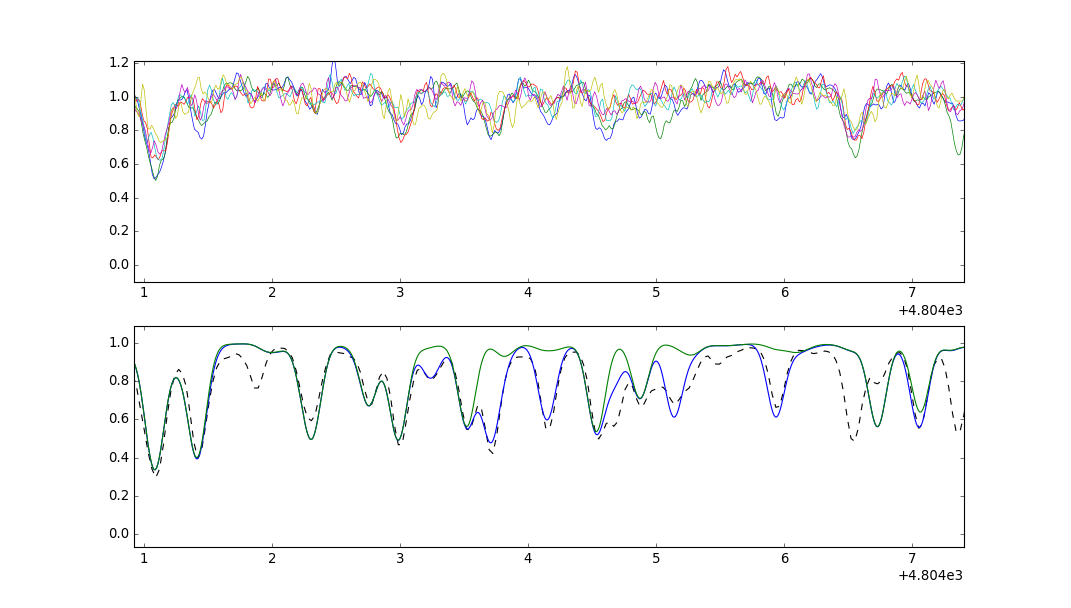

In [6]:
%matplotlib nbagg
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212,sharex=ax1)
#ax3 = fig.add_subplot(313,sharex=ax1)
plt.show()

In [209]:
sun = np.genfromtxt('solar580.dat', unpack=True)
arc = np.genfromtxt('arcturus/Arcturus_espadons.dat', unpack=True)

lst1 = open('sun/multi-session-vald/cv_016.spl')
mdpack1 = [np.genfromtxt(raw.strip(), unpack=True) for raw in lst1]
lst2 = open('arcturus/multi-session-vald/cv_014.spl')
mdpack2 = [np.genfromtxt(raw.strip(), unpack=True) for raw in lst2]

mods = open('multi-session-T4800G2.2/cv_036.spl')
synp = [np.genfromtxt(raw.strip(), unpack=True) for raw in mods]
obsg = open('gir-4800/splist')
gsmp = [np.genfromtxt(raw.strip(), unpack=True) for raw in obsg]
obsg2 = open('gir-h13-14/pltlst.dat')
gsmp2 = [np.genfromtxt(raw.strip(), unpack=True) for raw in obsg2]

obshi = open('uveslist')
uvsmp = [np.genfromtxt(raw.strip(), unpack=True) for raw in obshi]

In [260]:

##################
ax1.cla()
#ax1.plot(sun[0]-0.01, sun[1]/1., 'k--')
for s in uvsmp:
    ax1.plot(s[0], s[1], linewidth=0.6)
##################
ax2.cla()
ax2.plot(arc[0]+0.1, arc[1]/2.20, 'k--')
for s in mdpack2:
    ax2.plot(s[0], s[1])
###################
#ax3.cla()
#for s in synp:
#    ax3.plot(s[0], s[1])
#for s in gsmp:
#    ax3.plot(s[0], s[1], linewidth=0.6, ls='--')
#for s in gsmp2:
#    ax3.plot(s[0], s[1], linewidth=0.6, ls='--')
###################


########

In [259]:
deflims1 = ax1.axis()
deflims2 = ax2.axis()
#deflims3 = ax3.axis()

In [235]:
totlims1 = ax1.axis()
totlims2 = ax2.axis()

In [257]:
ax1.axis(deflims1)
ax2.axis(deflims2)
#ax3.axis(deflims3)

(5626.0016823492342,
 5644.5983176507661,
 0.014133745538327802,
 1.1121807455121657)

In [261]:
lbdn = 4808.147
rg = (deflims1[1]-deflims1[0])/2
ax1.axis((lbdn-rg, lbdn+rg, deflims1[2], deflims1[3]))

(4804.933542992072,
 4811.3604570079278,
 -0.10185802865882843,
 1.2151296614553782)

In [250]:
ax1.axis(totlims1)
ax2.axis(totlims2)

(4749.7744108070347,
 6844.7540359469685,
 -0.04551784814247184,
 1.0873780612577324)

In [251]:
#drawmarks(ax1, lineprops)
drawmarks(ax2, lineprops)
#drawmarks(ax3, lineprops)


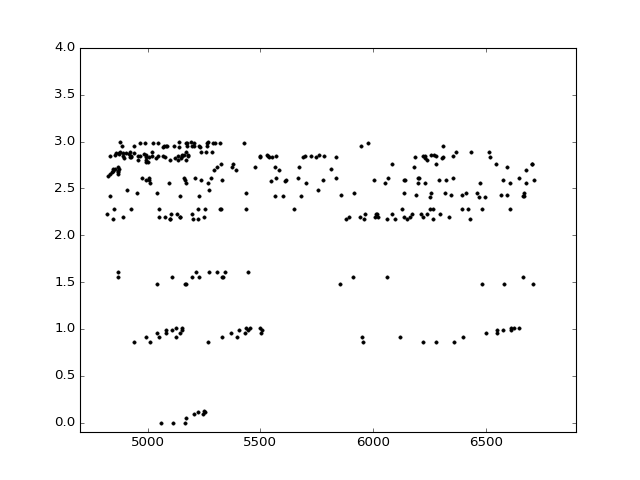

In [142]:
fig2 = plt.figure()
axl = fig2.add_subplot(111)
axl.cla()
for l in lineprops:
    if float(l[2]) < 3:
        axl.plot(l[1], l[2], 'k.')
axl.axis([4700, 6900, -0.1, 4])
plt.show()